<a href="https://colab.research.google.com/github/Raffae2679/Criptografia-de-texto/blob/main/Projeto_Criptografia_Decom_LU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Criptografia utilizando a decomposição LU
O projeto em questão consiste em através da decomposição LU, criptografar e descriptografar um texto ou mensagem. Foi feito uso de bibliotecas matematicas do python para auxiliar na realização das operações. 


---
 ## Etapas do Projeto:
  1. Escolha um texto a ser criptografado
  2. Escolha uma matriz que servirá como chave da criptografia (matriz K);
  3. Cifre o texto: **C = K.T (mod m)**
  4. Faça a decomposição LU da matriz K:  **K = L.U**
  5. Criptografe o texto escolhido: **X = L^1 . C (mod m)**
  6. Obtenha o texto original: **To = U^-1 . X (mod m)**  




# Bibliotecas Usadas no Projeto

- **[Numpy](https://numpy.org/doc/)**: Utilizado para criação dos arrays e manipulação desses objetos (Multiplicações, determinante, copiar...)
- **[Random](https://docs.python.org/3/library/random.html)**: Utilizado para gerar números aleatorios, que no projeto em questão, foram usados para popular o array da matriz K.
- **[Math](https://docs.python.org/3/library/math.html?highlight=math#module-math)**: Utilizado para realizar MDC entre o determinante da matriz k e o número de itens utilizado no projeto.
- **[Sympy](https://docs.sympy.org/latest/index.html)**: Utilizado para realizar uma operação especifica com matriz, calcular a matriz adjunta.

In [8]:
import random
import numpy as np
import math
from sympy import Matrix

# Funções Usadas No Projeto:

- **preenche_matriz**: Função responsável por receber do usuário a mensagem a ser criptografada e retornar a matriz com os valores correspondentes a cada uma das letras.

- **gera_matriz_k**: Função responsável por gerar a matriz k, seguindo alguns passos e respeitando condições especificas. As condições que a matriz k deve respeitar é que o mdc entre seu determinante e o número de letras deve ser igual a 1. Os passos para gerar a matriz k é que a primeira linha seja apenas de números "1", já a primeira posição de cada linha seguinte é um número aleatorio entre 1 e 80 e as posições seguintes são seus multiplos. ex:

   $K_{4,4} =
 \begin{pmatrix}
  1 & 1 & 1 & 1 \\
  3 & 9 & 27 & 81 \\
  4  & 16  & 64 & 256  \\
  9 & 81 & 729 & 6561
 \end{pmatrix}$

- **verifica_matriz_k**: Função responsável por verificar se a matriz K que é gerada pela função anterior, é possível obte-la pela multiplicação entre as matrizes L e U advindas da decomposição. Tinha percebido que algumas matrizes K's que eram geradas, não era possivel obte-las pela multiplicação das matrizes da decomposição, devido os valores acabarem ficando quebrados, consequentemente havendo perda de informação. Então essa função previne para que isso não ocorra. 

- **cifrar_texto**: Função responsável por cifrar o texto que foi passado pelo usuário. Essa função retorna uma matriz correspondente ao texto cifrado. Para cifrar o texto, é utilizado a seguinte formula: 

 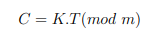

- **mostrar_texto**: Função responsável por percorrer a matriz, "printando" a mensagem que ela carrega, onde é realizado a substituição do valor númerico por letras.

- **decomposicaoLU**: Função responsável por realizar a decomposição LU da matriz K. O retorno dessa função são as matriz L e U, onde L é uma matriz triangular superior usada para criptografar o texto e U é uma matriz triangular inferior, usada para decriptografar o texto.

     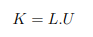

- **criptografar_texto**: Função responsável por criptografar o texto que havia sido cifrado na função anterior. A função segue a seguinte formula para realizar a criptografia: 

     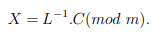

- **egcd**: Função responsável por realizar o algoritmo de euclides estendido, utilizado - em especial - para cálculo de inverso módular. Então, essa é uma função auxiliar que ajudará na função abaixo. 

- **modinv**: Função responsável por calcular inverso multiplicativo modular. 

- **calcula_u_inversa**: Função responsável por calcular a inversa da matriz U, levando em conta a seguinte formula: 

     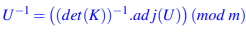

- **descriptografar_texto**: Função responsável por descriptografar o texto que havia sido criptografado anteriormente. A função faz uso da seguinte fórmula para descriptografar: 
     
     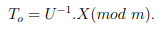

In [9]:
def preenche_matriz(dic_caracteres):
  texto = input("Digite o texto para ser criptografado: **Utilizar letras maiusculas e o número total de caracteres é 16\n > ")

  t = np.array([[0,0,0,0],
                [0,0,0,0],
                [0,0,0,0],
                [0,0,0,0]])

  contador=0
  for i in range(0,len(t)):
    for j in range(0,len(t[i])):
      t[i,j] = dic_caracteres[texto[contador+j]]
    contador+=1+j
  
  return t

#---------------------------------------------------------------------------------

def gera_matriz_k(numero_itens):
  verifica= False
  mat = np.array([[0,0,0,0],
                [0,0,0,0],
                [0,0,0,0],
                [0,0,0,0]])
  
  while(verifica==False):
    
    for i in range(0,len(t)):
      for j in range(0,len(t[i])):
        if i==0:
          mat[i,j] = 1
        elif j==0:
          mat[i,j] = random.randint(0,80)
        else:
          mat[i,j] = mat[i,j-1]*mat[i,0]
        
      

    det = round(np.linalg.det(mat))

    if(math.gcd(det,numero_itens)==1):
      verifica=True
  
  return mat


def verifica_matriz_k(m):
  verifica = False

  while(verifica==False):
    mat = gera_matriz_k(m)

    L,U = decomposicaoLU(mat)

    result = np.dot(L,U)

    if np.array_equal(mat,result):
      verifica = True
  
  return mat

#---------------------------------------------------------------------------------

def cifrar_texto(k,t,m):
  c = np.dot(k,t)

  # Mod m
  for i in range(0,len(c)):
    for j in range(0,len(c[i])):
      c[i,j]= round(c[i,j]%m)
  
  return c

def mostra_texto(mat, dic):
  lista_chaves = list(dic.keys())
  lista_valores = list(dic.values())

  for i in range(0,len(mat)):
    for j in range(0,len(mat[i])):
      print(lista_chaves[lista_valores.index(mat[i,j])], end="")

#---------------------------------------------------------------------------------

def decomposicaoLU(K):
    U = np.copy(K)
    n = len(U)   
    L = np.eye(n)
    for j in range(n-1):
        for i in range(j+1,n):
            L[i,j] = int(U[i,j]/U[j,j])
            for k in range(j+1,n):
                U[i,k] = U[i,k] - L[i,j]*U[j,k]
                U[i,j] = 0
                
    return L, U

#---------------------------------------------------------------------------------

def criptografar_texto(l,c,m):
  l_inversa = np.linalg.inv(l)

  x = np.dot(l_inversa,c)

  for i in range(0,len(c)):
    for j in range(0,len(c[i])):
      x[i,j]= round(x[i,j]%m)

  return x

#---------------------------------------------------------------------------------

def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

def modinv(a, m):
    g, x, y = egcd(a, m)
    if g != 1:
        raise Exception('modular inverse does not exist')
    else:
        return x % m

def calcula_u_inversa(det_k_inverso, U):
  adj_u = Matrix([[0,0,0,0],
                [0,0,0,0],
                [0,0,0,0],
                [0,0,0,0]])

  for i in range(0,len(U)):
    for j in range(0,len(U[i])):
      adj_u[i,j]= U[i,j]

  # Calcula adjunta
  adjunta_u = adj_u.adjugate()

  # transforma para np array
  u_inverso = np.array([[0,0,0,0],
                [0,0,0,0],
                [0,0,0,0],
                [0,0,0,0]])

  for i in range(0,len(U)):
    for j in range(0,len(U[i])):
      u_inverso[i,j]= round((adjunta_u[i,j]*det_k_inverso)%m)
  
  return u_inverso

#---------------------------------------------------------------------------------

def descriptografar_texto(u_inverso,x):
  to = np.dot(u_inverso,x)

  for i in range(0,len(x)):
    for j in range(0,len(x[i])):
      to[i,j] = round(to[i,j]%m)
  
  return to

# Execução do Projeto

In [10]:
# Dicionario com o valor dos caracteres
dic = {'A': 1,'B': 2,'C': 3,'D': 4,'E': 5,'F': 6,'G': 7,'H': 8,'I': 9,'J': 10,'K': 11,'L': 12,'M': 13,'N': 14,'O': 15,'P': 16,'Q': 17,'R': 18,'S': 19,'T': 20,'U': 21,'V': 22,'W': 23,'X': 24,'Y': 25,'Z': 26,' ': 27,'#': 28,'@': 0,}
m=len(dic)

t = preenche_matriz(dic)
print("Matriz T:\n {}\n\n".format(t))

k = verifica_matriz_k(m)
det_k = round(np.linalg.det(k))
print("Matriz K:\n {}\n".format(k))
print("Determinante K: {} | MDC(det k, m): {}\n\n".format(det_k, math.gcd(round(np.linalg.det(k)),m)))

c = cifrar_texto(k,t,m)
print("Matriz C:\n {}\n".format(c))
print("Texto Cifrado: ",end=" ")
mostra_texto(c,dic)
print("\n")

l,u = decomposicaoLU(k)
print("Matriz L:\n {}\n".format(l))
print("Matriz U:\n {}\n".format(u))
print("L.U = K:\n {}\n".format(np.dot(l,u)))
print("Comparando L*U com a matriz K: {}\n\n".format(np.array_equal(np.dot(l,u),k)))


x = criptografar_texto(l,c,m)
print("Matriz X:\n {}\n".format(x))
print("Texto Criptografado: ",end=" ")
mostra_texto(x,dic)
print("\n")

det_k_inverso = modinv(det_k,m)
u_inverso = calcula_u_inversa(det_k_inverso,u)
print("Matriz U inversa:\n {}\n".format(u_inverso))
to = descriptografar_texto(u_inverso, x)
print("Matriz Descriptografada:\n {}\n".format(to))
print("Texto Descriptografado: ",end=" ")
mostra_texto(to,dic)
print("\n")





Digite o texto para ser criptografado: **Utilizar letras maiusculas e o número total de caracteres é 16
 > CALCULO NUMERICO
Matriz T:
 [[ 3  1 12  3]
 [21 12 15 27]
 [14 21 13  5]
 [18  9  3 15]]


Matriz K:
 [[    1     1     1     1]
 [    2     4     8    16]
 [    7    49   343  2401]
 [   16   256  4096 65536]]

Determinante K: 12700800 | MDC(det k, m): 1


Matriz C:
 [[27 14 14 21]
 [26 14  4 17]
 [ 2  1 11 11]
 [27  9 22  4]]

Texto Cifrado:   NNUZNDQBAKK IVD

Matriz L:
 [[  1.   0.   0.   0.]
 [  2.   1.   0.   0.]
 [  7.  21.   1.   0.]
 [ 16. 120.  16.   1.]]

Matriz U:
 [[    1     1     1     1]
 [    0     2     6    14]
 [    0     0   210  2100]
 [    0     0     0 30240]]

L.U = K:
 [[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01]
 [7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03]
 [1.6000e+01 2.5600e+02 4.0960e+03 6.5536e+04]]

Comparando L*U com a matriz K: True


Matriz X:
 [[27. 14. 14. 21.]
 [ 1. 15.  5.  4.]
 [24. 23. 11. 1

# Referências



- [Função inversa multiplicativa módular - QA stack](https://qastack.com.br/programming/4798654/modular-multiplicative-inverse-function-in-python)

- [Função inversa multiplicativa módular - TI Enxame](https://www.ti-enxame.com/pt/python/funcao-inversa-multiplicativa-modular-em-python/972004398/#:~:text=Algum%20módulo%20Python%20padrão%20contém,%3D%3D%201%20(mod%20p)%20%3F)

- [Função inversa multiplicativa módular - Stack OverFlow](https://stackoverflow.com/questions/4798654/modular-multiplicative-inverse-function-in-python)